# Confidence Detection (Computer Vision)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.layers import Bidirectional, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import accuracy_score
import random

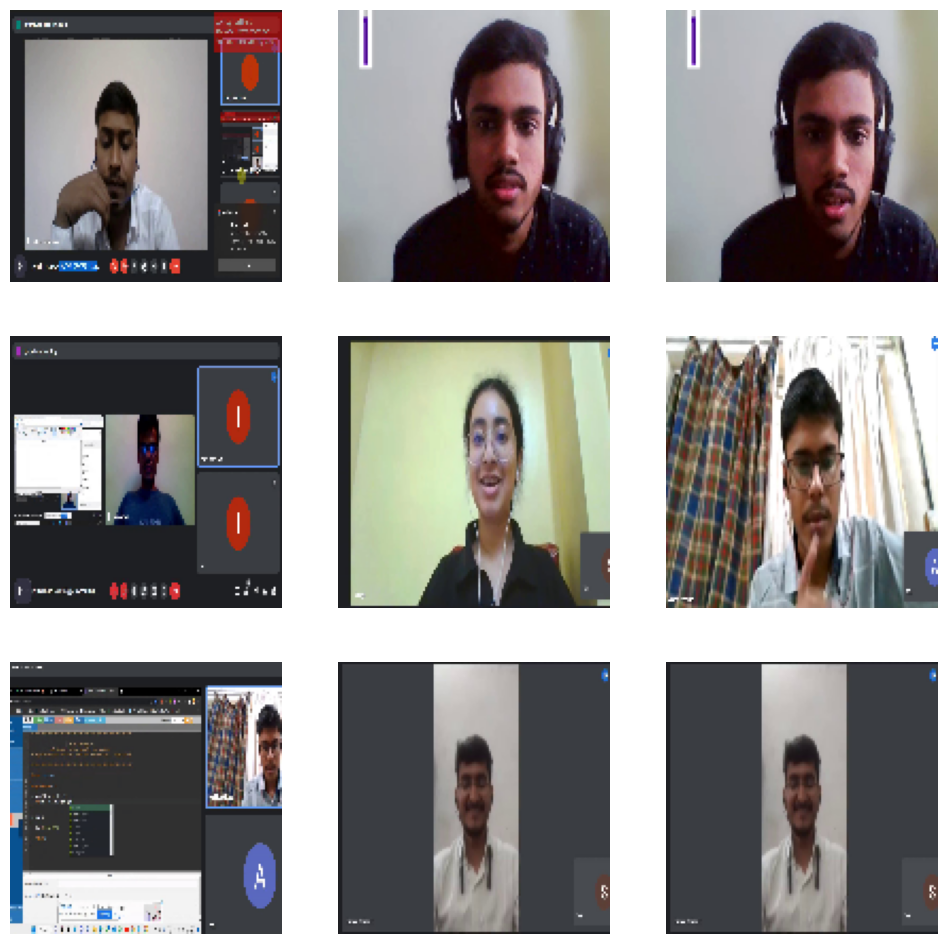

In [ ]:
picture_size = 128
folder_path = "emotion_detection/sorted_data"

expression = "confident"
img_dir = os.path.join(folder_path, expression)

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img_path = os.path.join(img_dir, os.listdir(img_dir)[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [ ]:
batch_size = 64

datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path,
                                             target_size=(picture_size, picture_size),
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             subset='training',
                                             shuffle=True)

val_set = datagen_train.flow_from_directory(folder_path,
                                            target_size=(picture_size, picture_size),
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            subset='validation',
                                            shuffle=False)

test_set = datagen_test.flow_from_directory(folder_path,
                                            target_size=(picture_size, picture_size),
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            shuffle=False)

Found 2303 images belonging to 2 classes.
Found 575 images belonging to 2 classes.
Found 2878 images belonging to 2 classes.


In [ ]:
# Model Architecture
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 10,209,921 (38.95 MB)

 Trainable params: 10,206,465 (38.93 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=3,
                                         verbose=1,
                                         min_delta=0.0001)

callbacks_list = [checkpoint, reduce_learningrate]

In [ ]:
%%time

epochs = 25

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=val_set,
    callbacks=callbacks_list
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6985 - loss: 0.6075
Epoch 1: val_accuracy improved from -inf to 0.68522, saving model to ./best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.7002 - loss: 0.6051 - val_accuracy: 0.6852 - val_loss: 0.6174 - learning_rate: 0.0010
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8099 - loss: 0.4783
Epoch 2: val_accuracy did not improve from 0.68522
36/36 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.8101 - loss: 0.4776 - val_accuracy: 0.3791 - val_loss: 0.7111 - learning_rate: 0.0010
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7936 - loss: 0.4851
Epoch 3: val_accuracy improved from 0.68522 to 0.68696, saving model to ./best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.7941 - loss: 0.4841 - val_accuracy: 0.6870 - val_loss: 0.5067 - learning_rate: 0.0010
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8208 - loss: 0.4324
Epoch 4: val_accuracy improved from 0.68696 to 0.89217, saving model to ./best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.8207 - loss: 0.4325 - val_accuracy: 0.8922 - val_loss: 0.4792 - learning_rate: 0.0010
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8264 - loss: 0.4440
Epoch 5: val_accuracy did not improve from 0.89217
36/36 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.8263 - loss: 0.4436 - val_accuracy: 0.6852 - val_loss: 0.5227 - learning_rate: 0.0010
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8097 - loss: 0.4661
Epoch 6: val_accuracy did not improve from 0.89217
36/36 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.8101 - loss: 0.4651 - val_accuracy: 0.8835 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8251 - loss: 0.4514
Epoch 7: val_accuracy did not improve from 0.89217

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
36/36 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.8250 - loss: 0.4509 - val_accuracy: 0.5426 - v

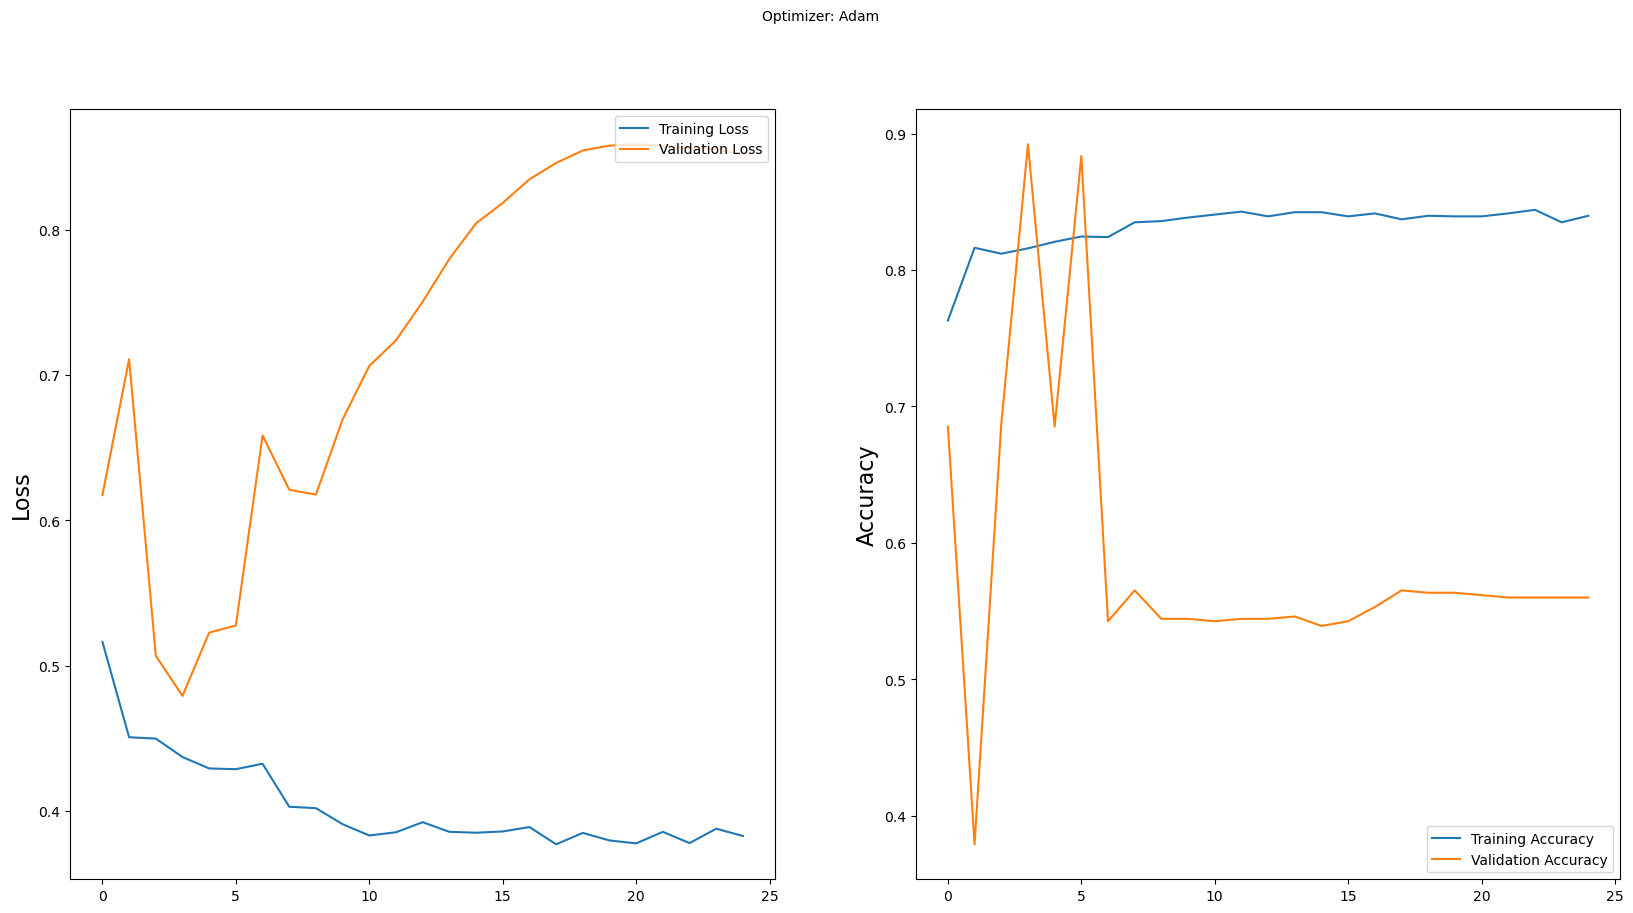

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))

45/45 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7170 - loss: 0.5937


In [ ]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.7783182859420776


In [ ]:
model.save('emotion_detection_25.keras')

In [ ]:
model.load_weights('./best_model.h5')

test_predictions = model.predict(test_set)
test_predictions = (test_predictions > 0.5).astype('int32')

true_labels = test_set.labels

accuracy = accuracy_score(true_labels, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 861ms/step
Test Accuracy: 75.19%


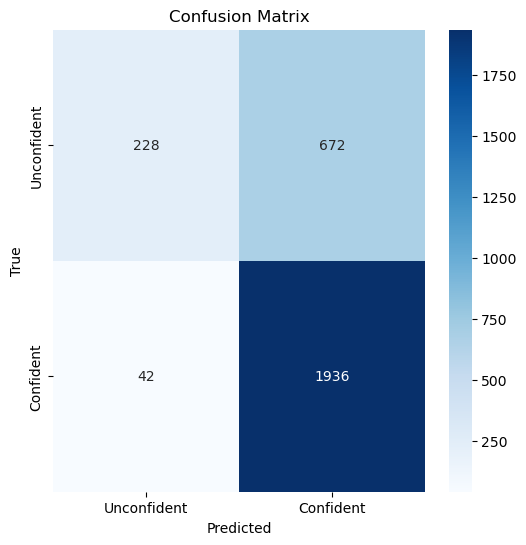

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, test_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unconfident', 'Confident'], yticklabels=['Unconfident', 'Confident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


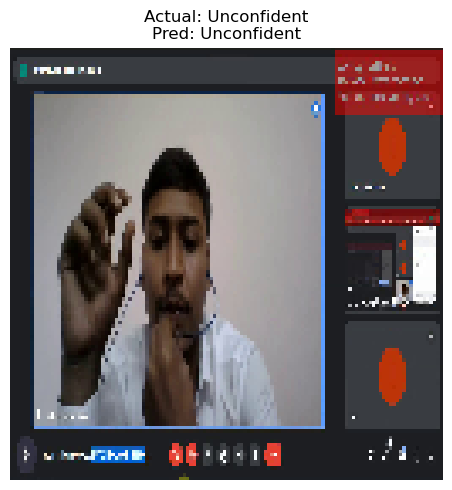

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('emotion_detection_25.keras')
picture_size = 128

confident_folder = "emotion_detection/sorted_data/confident"
unconfident_folder = "emotion_detection/sorted_data/unconfident"

confident_images = os.listdir(confident_folder)
unconfident_images = os.listdir(unconfident_folder)

random_confident_image = random.choice(confident_images)
random_unconfident_image = random.choice(unconfident_images)

random_image = random.choice([random_confident_image, random_unconfident_image])

plt.figure(figsize=(5, 5))

if random_image in confident_images:
    actual_label = 'Confident'
else:
    actual_label = 'Unconfident'

img_path = os.path.join(confident_folder if random_image in confident_images else unconfident_folder, random_image)
img = image.load_img(img_path, target_size=(picture_size, picture_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = 'Confident' if prediction[0] < 0.5 else 'Unconfident'

plt.imshow(img)
plt.axis('off')
plt.title(f"Actual: {actual_label}\nPred: {predicted_label}")
plt.tight_layout()
plt.show()

# Performance Analysis (Natural Language Processing)

In [ ]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
import warnings

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nlp = spacy.load('en_core_web_md')
print("Model Loaded Successfully!")

Model Loaded Successfully!


In [ ]:
df = pd.read_csv('QA_dataset.csv')

candidate_answers = [
    "Viruses are unique because they lack metabolic reactions and need a host to replicate.",
    "Noroviruses spread through contaminated water and cause stomach infections.",
    "Bacteria are prokaryotic organisms without a nuclear membrane."
]

In [ ]:
# Initialize NLTK lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing with NLTK
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to answers
df['Answer1_processed'] = df['Answer1'].apply(preprocess)
df['Answer2_processed'] = df['Answer2'].apply(preprocess)
df['Answer3_processed'] = df['Answer3'].apply(preprocess)

# Generate embeddings using spaCy
def get_embedding(text):
    doc = nlp(text)
    return doc.vector

df['Answer1_embedding'] = df['Answer1_processed'].apply(get_embedding)
df['Answer2_embedding'] = df['Answer2_processed'].apply(get_embedding)
df['Answer3_embedding'] = df['Answer3_processed'].apply(get_embedding)

# Preprocess and embed candidate answers
candidate_embeddings = [get_embedding(preprocess(ans)) for ans in candidate_answers]

# Calculate similarity between candidate and original answers
def calculate_similarity(candidate_embedding, original_embeddings):
    similarities = cosine_similarity([candidate_embedding], original_embeddings)
    return np.max(similarities)

In [ ]:
# Prepare data for Logistics Regression
X = []
y = []

for i, row in df.iterrows():
    for j in range(1, 4):
        X.append(row[f'Answer{j}_embedding'])
        y.append(1)

for candidate_embedding in candidate_embeddings:
    X.append(candidate_embedding)
    y.append(0)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy: 99.96%


In [ ]:
'''Using Logistic Regression to identify data-driven decision boundary for classifying answers
as 'Good' or 'Poor' etc instead of relying completely on arbitrary similarity thresholds.
While similarity scores quantify how close a candidate answer is to the original'''

# dump(clf, 'lr_model.joblib')
print("Logistic Regression model saved as 'lr_model.joblib'")

Logistic Regression model saved as 'lr_model.joblib'


In [ ]:
warnings.filterwarnings("ignore")

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00      2471

    accuracy                           1.00      2472
   macro avg       0.50      0.50      0.50      2472
weighted avg       1.00      1.00      1.00      2472



In [ ]:
from joblib import load

lr_model = load('lr_model.joblib')

def get_prediction_label(avg_sim):
    if avg_sim >= 0.9:
        return 'Excellent'
    elif 0.8 <= avg_sim < 0.9:
        return 'Good'
    elif 0.7 <= avg_sim < 0.8:
        return 'Satisfactory'
    elif 0.6 <= avg_sim < 0.7:
        return 'Not Bad'
    else:
        return 'Poor'

results = []
for i, candidate_embedding in enumerate(candidate_embeddings):
    sim1 = calculate_similarity(candidate_embedding, list(df['Answer1_embedding']))
    sim2 = calculate_similarity(candidate_embedding, list(df['Answer2_embedding']))
    sim3 = calculate_similarity(candidate_embedding, list(df['Answer3_embedding']))
    avg_sim = (sim1 + sim2 + sim3) / 3
    pred = lr_model.predict([candidate_embedding])[0]
    results.append({
        'Candidate Answer': candidate_answers[i],
        'Similarity with Answer1': sim1,
        'Similarity with Answer2': sim2,
        'Similarity with Answer3': sim3,
        'Average Similarity': avg_sim,
        'Prediction': get_prediction_label(avg_sim)
    })

results_df = pd.DataFrame(results)
results_df

,Candidate Answer,Similarity with Answer1,Similarity with Answer2,Similarity with Answer3,Average Similarity,Prediction
0,Viruses are unique because they lack metabolic...,0.845866,0.883820,0.855349,0.861678,Good
1,Noroviruses spread through contaminated water ...,0.878534,0.876352,0.842858,0.865915,Good
2,Bacteria are prokaryotic organisms without a n...,0.892402,0.907528,0.952651,0.917527,Excellent


In [ ]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_md')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

def get_embedding(text):
    doc = nlp(text)
    return doc.vector

def calculate_similarity(candidate_embedding, original_embeddings):
    similarities = cosine_similarity([candidate_embedding], original_embeddings)
    return np.max(similarities)

lr_model = load('lr_model.joblib')

def get_prediction_label(avg_sim):
    if avg_sim >= 0.9:
        return 'Excellent'
    elif 0.8 <= avg_sim < 0.9:
        return 'Good'
    elif 0.7 <= avg_sim < 0.8:
        return 'Satisfactory'
    elif 0.6 <= avg_sim < 0.7:
        return 'Not Bad'
    else:
        return 'Poor'

prompt_questions = [
    "What is the difference between supervised and unsupervised learning?",
    "How does a neural network work?",
    "What is the purpose of regularization in machine learning?"
]

original_answers = [
    "Supervised learning uses labeled data to train models, while unsupervised learning finds patterns in unlabeled data.",
    "A neural network consists of layers of neurons that process input data through weighted connections and activation functions to produce output.",
    "Regularization prevents overfitting by adding a penalty for large coefficients in the model."
]

candidate_answers = [
    "Supervised learning requires labeled data, whereas unsupervised learning works with unlabeled data to identify patterns.",
    "Neural networks use layers of nodes to transform input data into output through weights and activation functions.",
    "Regularization reduces overfitting by penalizing complex models."
]

original_embeddings = [get_embedding(preprocess(ans)) for ans in original_answers]
candidate_embeddings = [get_embedding(preprocess(ans)) for ans in candidate_answers]

results = []
for i, candidate_embedding in enumerate(candidate_embeddings):
    sim1 = calculate_similarity(candidate_embedding, [original_embeddings[0]])
    sim2 = calculate_similarity(candidate_embedding, [original_embeddings[1]])
    sim3 = calculate_similarity(candidate_embedding, [original_embeddings[2]])
    avg_sim = (sim1 + sim2 + sim3) / 3
    pred = lr_model.predict([candidate_embedding])[0]
    results.append({
        'Prompt Question': prompt_questions[i],
        'Original Answer': original_answers[i],
        'Candidate Answer': candidate_answers[i],
        'Similarity with Original Answer1': sim1,
        'Similarity with Original Answer2': sim2,
        'Similarity with Original Answer3': sim3,
        'Average Similarity': avg_sim,
        'Prediction': get_prediction_label(avg_sim)
    })

results_df = pd.DataFrame(results)
results_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/illurisaisandeep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Prompt Question,Original Answer,Candidate Answer,Similarity with Original Answer1,Similarity with Original Answer2,Similarity with Original Answer3,Average Similarity,Prediction
0,What is the difference between supervised and ...,Supervised learning uses labeled data to train...,"Supervised learning requires labeled data, whe...",0.969035,0.689913,0.713406,0.790785,Satisfactory
1,How does a neural network work?,A neural network consists of layers of neurons...,Neural networks use layers of nodes to transfo...,0.686249,0.950776,0.674099,0.770375,Satisfactory
2,What is the purpose of regularization in machi...,Regularization prevents overfitting by adding ...,Regularization reduces overfitting by penalizi...,0.644974,0.559264,0.845579,0.683272,Not Bad


# ChatBot (Large Language Model)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

print("Model loaded successfully!")

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
Some parameters are on the meta device because they were offloaded to the disk.


Model loaded successfully!


In [14]:
# @title Chatbot with R1

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

def chat_loop():
    """
    Runs an interactive chat loop where the user can input text and receive model-generated responses.
    Type 'exit' to stop the conversation.
    """

    print("AI Chatbot is ready! Type 'exit' to end the conversation.\n")

    while True:
        prompt = input("嘿兄弟，怎么了: ")


        if prompt.lower() == "exit":
            print("Chatbot: 谢谢!")
            break


        inputs = tokenizer(
            prompt,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=500,
                temperature=0.7,
                pad_token_id=tokenizer.eos_token_id
            )


        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"Chatbot: {response}\n")


chat_loop()

AI Chatbot is ready! Type 'exit' to end the conversation.

嘿兄弟，怎么了: which is better: deepseek or chatgpt ?
Chatbot: which is better: deepseek or chatgpt ?"
<think>

</think>

As an AI assistant, I don't have access to internal company information. For more details about DeepSeek, please visit its official website.

嘿兄弟，怎么了: which is better deepseek or chatgpt for mathematics?
Chatbot: which is better deepseek or chatgpt for mathematics? I want to improve my math skills, so I need to choose one of them to focus on.
I need to figure out which of these two platforms is better for improving my math skills. I have a basic understanding of algebra and calculus, but I want to become more confident in areas like geometry, trigonometry, and statistics. I also want to practice more challenging problems and perhaps take some advanced courses. 

I need to compare the features of both platforms to determine which one is more suitable for my goals. So, what are the key differences between DeepSeek a

# Integration

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/drive/MyDrive/Colab Files/emotion_detection_25.keras')
picture_size = 128

image_path = '/content/drive/MyDrive/Colab Files/730.jpg'

img = image.load_img(image_path, target_size=(picture_size, picture_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = 'Confident' if prediction[0] < 0.5 else 'Unconfident'

predicted_label

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'Confident'

In [6]:
!pip install spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import numpy as np
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_md')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
lr_model = load('/content/drive/MyDrive/Colab Files/lr_model.joblib')

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

def get_embedding(text):
    doc = nlp(text)
    return doc.vector

def calculate_similarity(candidate_embedding, original_embedding):
    return cosine_similarity([candidate_embedding], [original_embedding])[0][0]

question = "What is the difference between supervised and unsupervised learning?"
original_answer = "Supervised learning uses labeled data to train models, while unsupervised learning finds patterns in unlabeled data."
candidate_answer = "Supervised learning requires labeled data, whereas unsupervised learning doesnot"

original_embedding = get_embedding(preprocess(original_answer))
candidate_embedding = get_embedding(preprocess(candidate_answer))

similarity_score = calculate_similarity(candidate_embedding, original_embedding)
prediction = 'Good' if similarity_score >= 0.7 else 'Poor'

print(f"Question: {question}")
print(f"Original Answer: {original_answer}")
print(f"Candidate Answer: {candidate_answer}")
print(f"Similarity Score: {similarity_score:.2f}")
print(f"Performance Prediction: {prediction}")

simple_question = "What is machine learning?"
hard_question = "Can machines achieve true consciousness or self-awareness?"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Question: What is the difference between supervised and unsupervised learning?
Original Answer: Supervised learning uses labeled data to train models, while unsupervised learning finds patterns in unlabeled data.
Candidate Answer: Supervised learning requires labeled data, whereas unsupervised learning doesnot
Similarity Score: 0.88
Performance Prediction: Good

Questions for Chatbot:
Simple Question: What is machine learning?
Hard Question: Can machines achieve true consciousness or self-awareness?


In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

# Load model
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

print("Model loaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model loaded successfully!


In [9]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

def chat_loop():
    """
    Runs an interactive chat loop where the user can input text and receive model-generated responses.
    Type 'exit' to stop the conversation.
    """

    print("AI Chatbot is ready! Type 'exit' to end the conversation.\n")

    while True:
        prompt = input("嘿兄弟，怎么了: ")


        if prompt.lower() == "exit":
            print("Chatbot: 谢谢!")
            break


        inputs = tokenizer(
            prompt,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=500,
                temperature=0.7,
                pad_token_id=tokenizer.eos_token_id
            )


        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"Chatbot: {response}\n")

chat_loop()

AI Chatbot is ready! Type 'exit' to end the conversation.

嘿兄弟，怎么了: Which is better, chatgpt or deepseek?
Chatbot: Which is better, chatgpt or deepseek? Which is better, geeksforgeeks or quora? Which is better, ed2k or bing?

Hi, I have a question about the relative strengths of these search engines. I want to understand which is better for answering questions: ChatGPT, DeepSeek, Geeksforgeeks, Quora, Ed2k, or Bing.

I'm not very experienced with these services, but I know that they are all used to find information quickly and answer questions. So, I'd like to compare them based on factors like speed, accuracy, ease of use, community support, SEO, and user-generated content. I wonder if these factors would make one engine better than the others.

First, I need to understand what each of these engines does. ChatGPT is an AI chatbot, right? It's designed to generate responses to user questions. DeepSeek is an AI search engine, so it's meant to find information quickly. Geeksforgeeks is a

# Algorithm

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import warnings

warnings.filterwarnings("ignore")

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

class InterviewAssessment:
    def __init__(self):
        self.cv_model = load_model('/content/drive/MyDrive/Colab Files/emotion_detection_25.keras')
        self.picture_size = 128

        self.nlp = spacy.load('en_core_web_md')
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.lr_model = load('/content/drive/MyDrive/Colab Files/lr_model.joblib')

        self.questions = {
            'simple': [
                {
                    'question': "What is machine learning?",
                    'original_answer': "Machine learning is a subset of artificial intelligence that involves training algorithms to learn patterns from data and make predictions or decisions without being explicitly programmed."
                },
                {
                    'question': "What is a neural network?",
                    'original_answer': "A neural network is a computational model inspired by the human brain, consisting of interconnected layers of nodes (neurons) that process input data to produce output."
                },
                {
                    'question': "What is the difference between classification and regression?",
                    'original_answer': "Classification is used to predict discrete labels or categories, while regression is used to predict continuous numerical values."
                }
            ],
            'hard': [
                {
                    'question': "Can machines achieve true consciousness or self-awareness?",
                    'original_answer': "Machines can simulate aspects of consciousness, but true consciousness or self-awareness remains a philosophical and scientific debate, as it involves subjective experience."
                },
                {
                    'question': "Explain the backpropagation algorithm in detail.",
                    'original_answer': "Backpropagation is a supervised learning algorithm used to train neural networks by calculating the gradient of the loss function with respect to each weight, and adjusting the weights to minimize the loss."
                },
                {
                    'question': "What are the ethical implications of AI in society?",
                    'original_answer': "The ethical implications of AI include concerns about bias, privacy, job displacement, accountability, and the potential for misuse in surveillance or autonomous weapons."
                }
            ]
        }
        self.current_question = None
        self.original_answer = None

    def get_confidence(self, image_path):
        img = image.load_img(image_path, target_size=(self.picture_size, self.picture_size))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = self.cv_model.predict(img_array)
        return 'Confident' if prediction[0] < 0.5 else 'Unconfident'

    def preprocess(self, text):
        tokens = nltk.word_tokenize(text.lower())
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in self.stop_words]
        return ' '.join(tokens)

    def get_embedding(self, text):
        doc = self.nlp(text)
        return doc.vector

    def calculate_similarity(self, candidate_embedding, original_embedding):
        return cosine_similarity([candidate_embedding], [original_embedding])[0][0]

    def get_performance(self, candidate_answer):
        original_embedding = self.get_embedding(self.preprocess(self.original_answer))
        candidate_embedding = self.get_embedding(self.preprocess(candidate_answer))

        similarity_score = self.calculate_similarity(candidate_embedding, original_embedding)
        return 'Good' if similarity_score >= 0.7 else 'Poor'

    def get_next_question(self, performance):
        if performance == 'Good':
            question_data = np.random.choice(self.questions['hard'])
        else:
            question_data = np.random.choice(self.questions['simple'])

        self.current_question = question_data['question']
        self.original_answer = question_data['original_answer']
        return self.current_question

class Chatbot:
    def __init__(self):
        self.model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_id, trust_remote_code=True)
        self.model = AutoModelForCausalLM.from_pretrained(
            self.model_id,
            torch_dtype=torch.float16,
            device_map="auto",
            trust_remote_code=True
        )

    def generate_response(self, prompt):
        inputs = self.tokenizer(
            prompt,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(self.model.device)

        with torch.no_grad():
            outputs = self.model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=500,
                temperature=0.7,
                pad_token_id=self.tokenizer.eos_token_id
            )

        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return response

def chat_loop():
    assessment = InterviewAssessment()
    chatbot = Chatbot()

    image_path = '/content/drive/MyDrive/Colab Files/730.jpg'
    confidence = assessment.get_confidence(image_path)
    print(f"Chatbot: Welcome! Based on your confidence level, you seem {confidence}.")

    performance = 'Poor'
    question = assessment.get_next_question(performance)
    print(f"Chatbot: Let's start with a question: {question}")
    candidate_answer = input("Your answer: ")

    performance = assessment.get_performance(candidate_answer)
    print(f"Chatbot: Performance on this question is: {performance}")

    print("\nChatbot: Let's continue the conversation!")
    while True:
        question = assessment.get_next_question(performance)
        print(f"Chatbot: Here's your next question: {question}")
        candidate_answer = input("Your answer: ")

        performance = assessment.get_performance(candidate_answer)
        print(f"Chatbot: Performance on this question is: {performance}")

        if performance == 'Good':
            print("Chatbot: Great job! You're doing well. Let's try something more challenging.")
        else:
            print("Chatbot: Let's try a simpler question.")

        if input("Chatbot: Type 'exit' to end the conversation or press Enter to continue: ").lower() == 'exit':
            print("Chatbot: Thank you for the conversation!")
            break

chat_loop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Chatbot: Welcome! Based on your confidence level, you seem Confident.
Chatbot: Let's start with a question: What is the difference between classification and regression?
Your answer: I don't know
Chatbot: Performance on this question is: Poor

Chatbot: Let's continue the conversation!
Chatbot: Here's your next question: What is a neural network?
Your answer: A neural network is a computational model inspired by the human brain, consisting of interconnected layers of nodes (neurons) that process input data to produce output.
Chatbot: Performance on this question is: Good
Chatbot: Great job! You're doing well. Let's try something more challenging.
Chatbot: Type 'exit' to end the conversation or press Enter to continue: exit
Chatbot: Thank you for the conversation!
